## Time Series Climate Forecasting
### Dataset obtained from Kaggle: https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

### Project on time series analysis: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [158]:
train_data = pd.read_csv('DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('DailyDelhiClimateTest.csv')

In [159]:
train_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [160]:
train_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [161]:
data = train_data[['date','meantemp']]

In [162]:
data.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [163]:
data.meantemp.min(), data.meantemp.max()

(6.0, 38.714285714285715)

In [164]:
data.date.min(), data.date.max() ## we got 4 years worth of data

('2013-01-01', '2017-01-01')

In [165]:
data.groupby('date')['meantemp']

data = data.set_index('date')
data.index

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01'],
      dtype='object', name='date', length=1462)

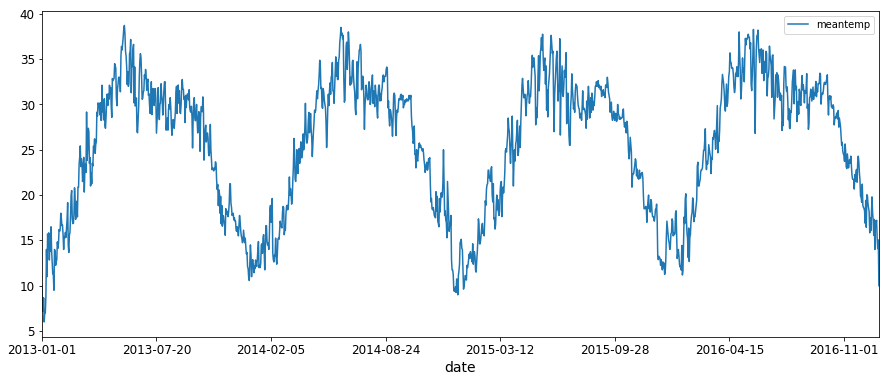

In [166]:
data.plot(figsize=(15,6))

### Quite obvious, the mean temperature varies from season to season as can be seen from the plot above

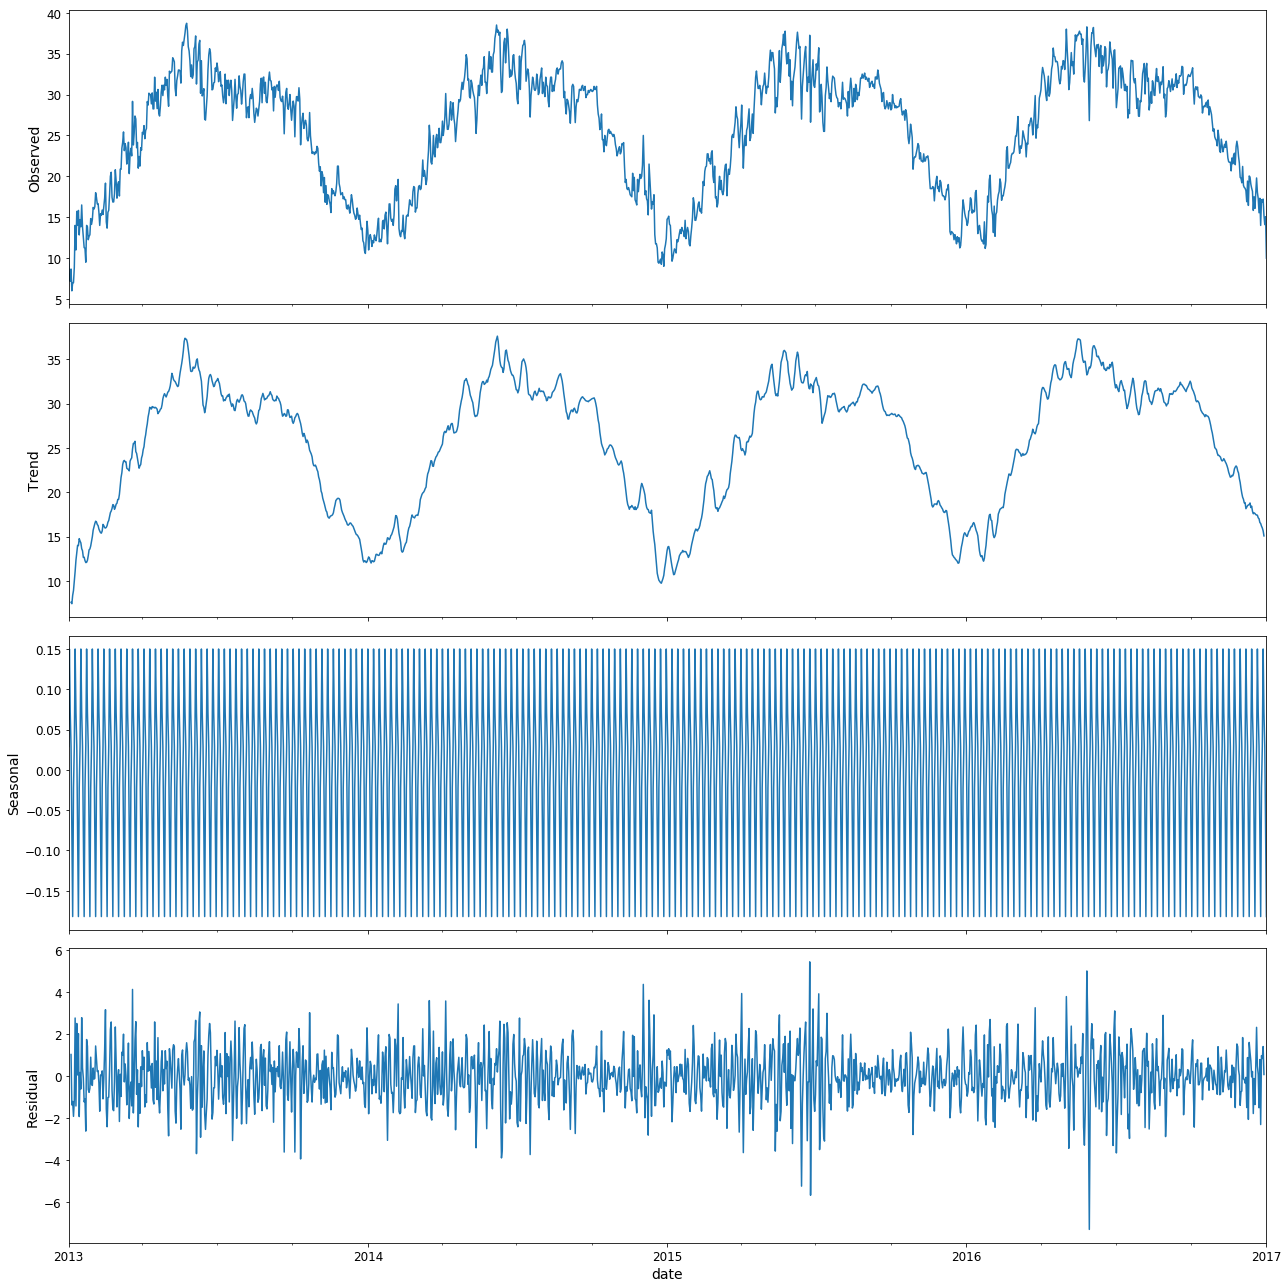

In [167]:
from pylab import rcParams
import statsmodels.api as sm
import matplotlib
rcParams['figure.figsize'] = 18, 18

data.reset_index(inplace=True)
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')


decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

### From the plot above, we can quite clearly assume that the mean temperature is quite stable throughout the seasons. Next topic we will work with a more ambigious topic

### So now we can do a couple of things, we can fit an ARIMA model which is a model used for analyzing and forecasting time series data OR we can apply Linear Regression. With Linear Regression we can fit more variables in our prediction but there is an option of utilizing a multivariate ARIMA model. It seems that the Arima model is preferred so we will apply it.

### Here is a link to some time series forecasting methods: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [168]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [169]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### We can now use the triplets of parameters defined above to automate the process of training and evaluating ARIMA models on different combinations. In Statistics and Machine Learning, this process is known as grid search (or hyperparameter optimization) for model selection.

### Check out this link: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

### The code chunk below iterates through combinations of parameters and uses the SARIMAX function from statsmodels to fit the corresponding Seasonal ARIMA model. Here, the order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

In [170]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:13728.406218833028
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11861.512040959846
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7593.221834328767
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7503.747978310121
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7598.038598277444
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:7583.119006472722
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7506.018832139425
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7500.524209680179
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11852.756613716218
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:10287.284579816445
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6869.607370055412
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6725.943248622466
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6876.984669568817
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6798.000580170412
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6717.207535076241
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6709.822480978046
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5642.894908952461
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5578.991494796897
ARIMA(

In [178]:
(results.aic).min()

5482.900811162814

### The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 5482.9. We should therefore consider this to be optimal option out of all the models we have considered. Now lets fit the model

In [172]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5711      0.047     12.272      0.000       0.480       0.662
ma.L1         -0.8016      0.037    -21.703      0.000      -0.874      -0.729
ar.S.L12      -0.0037      0.002     -1.621      0.105      -0.008       0.001
ma.S.L12      -1.0195      0.011    -91.139      0.000      -1.041      -0.998
sigma2         2.4910      0.086     28.818      0.000       2.322       2.660


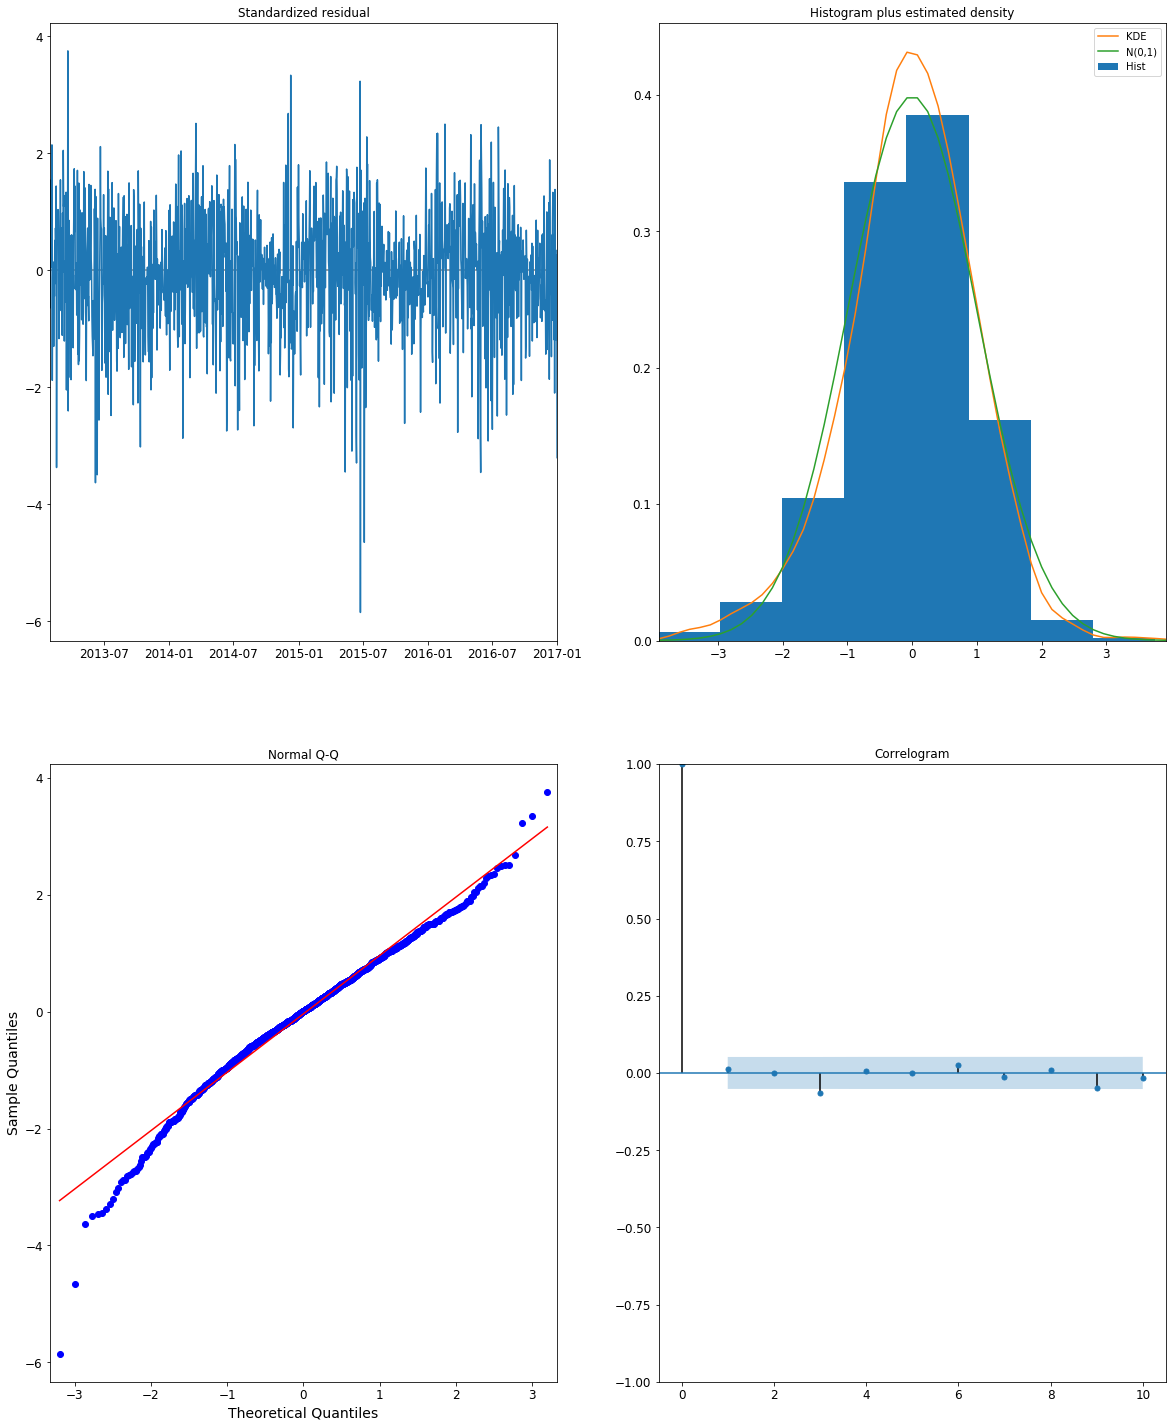

In [173]:
results.plot_diagnostics(figsize=(20, 25))
plt.show()

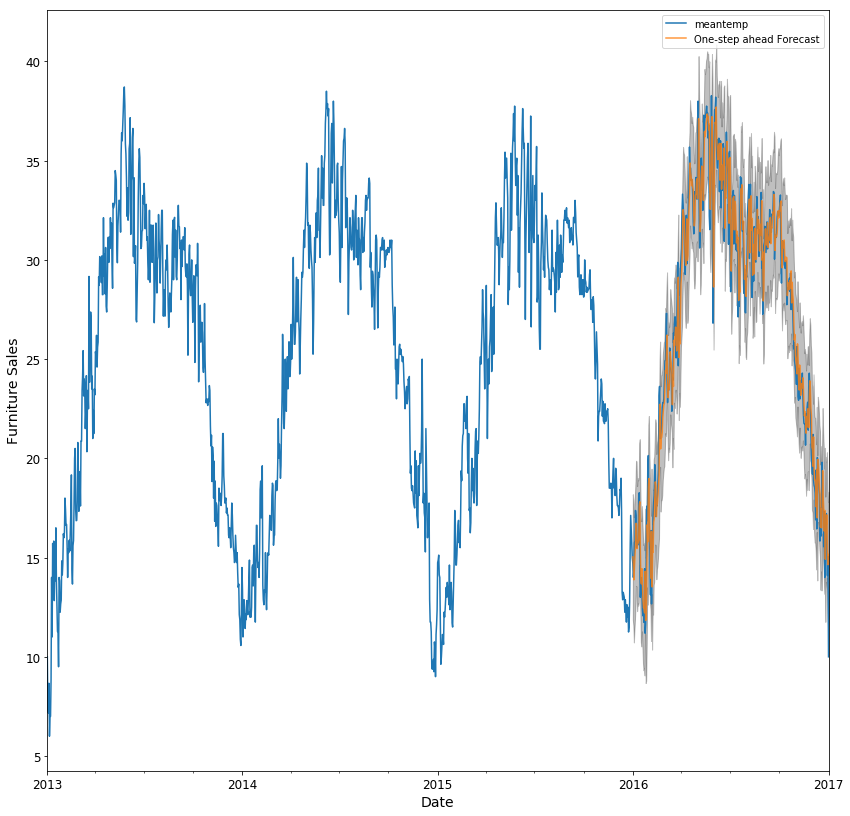

In [214]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 14))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### The predicted values seem to align with the factual values. Now lets visualize the forecast for the up and coming seasons

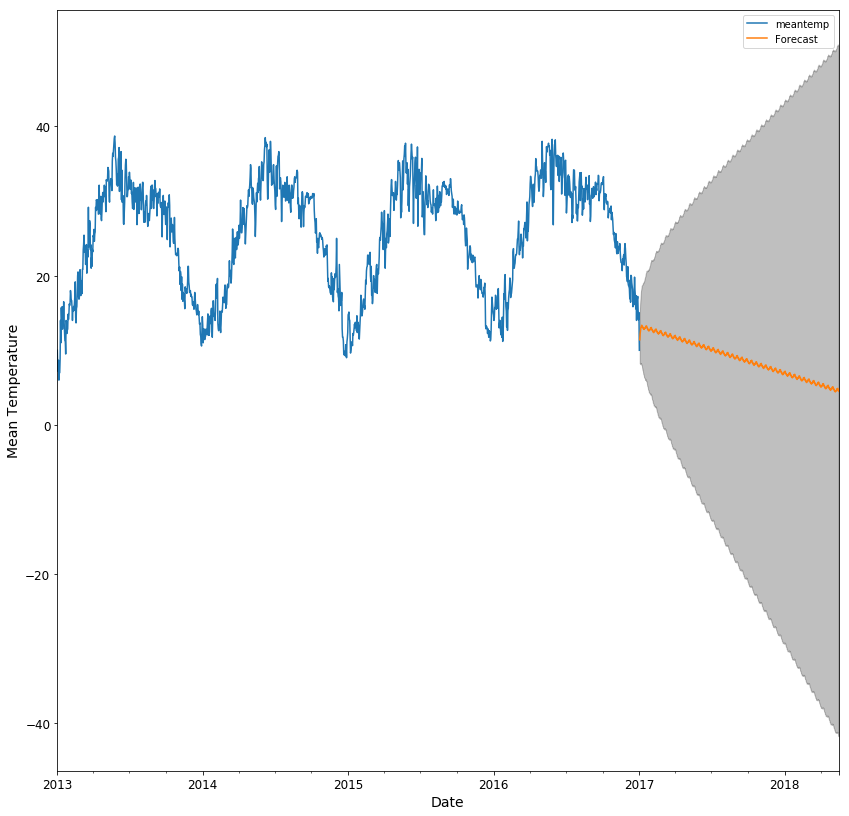

In [215]:
pred_uc = results.get_forecast(steps=500)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='observed', figsize=(14, 14
                                         ))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature')
plt.legend()
plt.show()

### I dont understand why the forecast is being displayed as it is being shown above. Mean squared error returns 'NaN'.